In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = "/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv"
df = pd.read_csv(path)

In [ ]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000


In [ ]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Stock Trading
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000


In [ ]:
df = df['Open']
df.head()

0    42120
1    43000
2    43940
3    43140
4    43310
Name: Open, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
def plot_series(data):
    for df in data:
        plt.plot(df)
    plt.show()

In [ ]:
train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)):]

In [ ]:
def arrange(data, window = 10):
    x = []
    y = []
    for i, val in enumerate(data):
        if i<window:
          continue
        x.append(data[i-window: i-1].values.reshape(-1,1))
        y.append(data[i:i+1].values.reshape(-1,1))
    x = np.asarray(x)
    y = np.asarray(y)
    return x,y

In [ ]:
X_train, y_train = arrange(train, 15)
print("x-shape is: {} and y-shape is: {}".format(X_train.shape, y_train.shape))

x-shape is: (965, 14, 1) and y-shape is: (965, 1, 1)


In [ ]:
print(X_train[0])
print(y_train[0])

[[42120]
 [43000]
 [43940]
 [43140]
 [43310]
 [43660]
 [43900]
 [42910]
 [42790]
 [43350]
 [43440]
 [43300]
 [43130]
 [43950]]
[[41480]]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

In [ ]:
X_train.shape[1:]

(14, 1)

In [ ]:
Net = Sequential()
Net.add(SimpleRNN(3, activation = 'relu', input_shape=X_train.shape[1:]))
Net.add(Dense(1, activation = 'relu'))

Net.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Net.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

In [ ]:
Net.fit(X_train, y_train, epochs=10)

Epoch 1/10
31/31 [==============================] - 1s 3ms/step - loss: 20148292.0000 - mse: 20148292.0000
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 2385842.2500 - mse: 2385842.2500
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 1959544.8750 - mse: 1959544.8750
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 1906507.1250 - mse: 1906507.1250
Epoch 5/10
31/31 [==============================] - 0s 4ms/step - loss: 1907292.6250 - mse: 1907292.6250
Epoch 6/10
31/31 [==============================] - 0s 4ms/step - loss: 1906930.7500 - mse: 1906930.7500
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 1904151.8750 - mse: 1904151.8750
Epoch 8/10
31/31 [==============================] - 0s 4ms/step - loss: 1908580.6250 - mse: 1908580.6250
Epoch 9/10
31/31 [==============================] - 0s 5ms/step - loss: 1902061.7500 - mse: 1902061.7500
Epoch 10/10
31/31 [==============================] - 

In [ ]:
X_test, y_test = arrange(test, 15)
pred = Net.predict(X_test)
pred

array([[19213.375 ],
       [18794.395 ],
       [18624.012 ],
       [19065.445 ],
       [18566.75  ],
       [18373.043 ],
       [18496.9   ],
       [18161.61  ],
       [17768.428 ],
       [17915.447 ],
       [17588.006 ],
       [17350.55  ],
       [17353.16  ],
       [17224.98  ],
       [16728.666 ],
       [16719.395 ],
       [17043.613 ],
       [16900.566 ],
       [16826.148 ],
       [17330.775 ],
       [17464.23  ],
       [17486.781 ],
       [17308.66  ],
       [17522.135 ],
       [17858.5   ],
       [17814.258 ],
       [17964.383 ],
       [17903.457 ],
       [17949.355 ],
       [17572.895 ],
       [16872.701 ],
       [17000.9   ],
       [17126.46  ],
       [16783.213 ],
       [16832.668 ],
       [16252.066 ],
       [15995.516 ],
       [16095.59  ],
       [16544.793 ],
       [17736.115 ],
       [18585.979 ],
       [18441.586 ],
       [18314.26  ],
       [18181.508 ],
       [17887.605 ],
       [17498.406 ],
       [18034.934 ],
       [18489

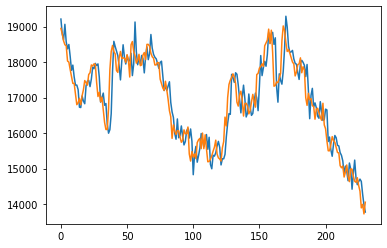

In [ ]:
plot_series([pred[:,0], y_test[:,:,0]])